In [1]:
from cowerc_adsorption import (
    PhysicalParams,
    Simulation,
    ExperimentalBreakthroughData,
    plot_btc_and_data,
)

import matplotlib.pyplot as plt
import numpy as np

from math import pi
from pathlib import Path

import pandas as pd

In [2]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "DI Water All Contaminants"

In [3]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
xls_setup.rename(columns={"Unnamed: 1": "Value"}, inplace=True)

setup = xls_setup.to_dict()["Value"]
xls_setup

,Value
Design Parameters,
Column Diameter (cm),0.660000
Column Area (cm^2),0.340000
Particle Size (cm),0.016800
Column Diameter/Particle Size Ratio,39.285714
Reynold&apos;s Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.080000
EBCT,0.180000
Flow Rate (mL/s),0.028000


In [4]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1, nrows=12, usecols="D:K")
xls_influent.set_index("Unnamed: 3", inplace=True)

print("Influent in ng/L")
display(xls_influent)

contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS", "PFOS"]
molecular_weight = {
    "PFBA": 214.04,
    "BEZ": 361.8,
    "PFHxA": 314.05,
    "DCF": 296.1,
    "PFOA": 414.1,
    "PFHxS": 400.11,
    "PFOS": 500.13,
}

c_0 = xls_influent.mean()[contaminants].to_numpy()  # ng/L
c_0 = c_0 / np.array(list(molecular_weight.values()))  # nmol/L

print("Initial concentrations [nM]:")
for k, v in zip(contaminants, c_0):
    print(f"{k:>6}: {v:.3f}")

Influent in ng/L


,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA,PFOS
Unnamed: 3,,,,,,,
INF 0 (1-5),5146.750000,5479.85,5458.700000,4559.300000,2934.500000,NaN,3309.800000
INF 1,4594.600000,5045.20,4887.150000,4428.450000,3553.300000,5220.050000,2671.300000
INF 2,4822.050000,5110.95,5063.250000,4591.000000,3584.500000,5245.000000,3306.800000
INF 3,4729.100000,5081.75,5103.050000,4721.200000,4004.450000,5613.550000,3018.550000
INF AVG (7-15),4715.250000,5079.30,5017.816667,4580.216667,3714.083333,5359.533333,2998.883333
INF 4,4582.050000,4726.15,4690.850000,4532.400000,941.700000,5307.550000,4206.350000
INF 5,4757.200000,4870.65,4882.200000,4900.650000,1044.250000,5509.450000,7153.300000
INF AVG (16-21),4669.625000,4798.40,4786.525000,4716.525000,992.975000,5408.500000,5679.825000
INF 6,4819.450000,4774.00,4532.450000,4398.300000,3026.800000,4681.650000,4360.100000


Initial concentrations [nM]:
  PFBA: 23.997
   BEZ: 12.488
 PFHxA: 15.748
   DCF: 8.958
  PFOA: 11.527
 PFHxS: 12.044
  PFOS: 8.097


In [5]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=19, usecols="A:S")
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0,PFOS,PFOS C/C0
0,1.0,113.454545,187.200,645.517241,3.068852e+03,0.25,0.000053,0.00,0.000000,0.45,0.000090,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
1,2.0,266.283636,439.368,1515.062069,7.202754e+03,0.35,0.000074,0.00,0.000000,0.10,0.000020,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,3.0,615.374545,1015.368,3501.268966,1.664538e+04,0.10,0.000021,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
3,4.0,1295.132121,2136.968,7368.855172,3.503226e+04,0.25,0.000053,0.00,0.000000,0.20,0.000040,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
4,5.0,1673.313939,2760.968,9520.579310,4.526177e+04,0.55,0.000117,0.00,0.000000,0.65,0.000130,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
5,7.0,3352.586667,5531.768,19075.062069,9.068472e+04,1.30,0.000276,1.65,0.000325,0.00,0.000000,2.95,0.000644,1.10,0.000296,0.00,0.000000,0.45,0.000150
6,8.0,4472.950303,7380.368,25449.544828,1.209896e+05,0.65,0.000138,1.15,0.000226,0.00,0.000000,3.90,0.000851,1.05,0.000283,0.00,0.000000,0.00,0.000000
7,9.0,5820.829091,9604.368,33118.510345,1.574487e+05,0.50,0.000106,1.00,0.000197,0.00,0.000000,6.45,0.001408,1.05,0.000283,0.00,0.000000,0.00,0.000000
8,10.0,8439.010909,13924.368,48015.062069,2.282683e+05,2.35,0.000498,7.30,0.001437,0.05,0.000010,22.75,0.004967,2.90,0.000781,0.00,0.000000,0.00,0.000000
9,11.0,11153.920000,18403.968,63461.958621,3.017044e+05,2.60,0.000551,10.85,0.002136,0.00,0.000000,32.90,0.007183,4.20,0.001131,1.05,0.000196,0.00,0.000000


In [6]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

In [7]:
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0,PFOS,PFOS C/C0
0,1.0,113.454545,187.200,645.517241,3.068852e+03,0.25,0.000053,0.00,0.000000,0.45,0.000090,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
1,2.0,266.283636,439.368,1515.062069,7.202754e+03,0.35,0.000074,0.00,0.000000,0.10,0.000020,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,3.0,615.374545,1015.368,3501.268966,1.664538e+04,0.10,0.000021,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
3,4.0,1295.132121,2136.968,7368.855172,3.503226e+04,0.25,0.000053,0.00,0.000000,0.20,0.000040,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
4,5.0,1673.313939,2760.968,9520.579310,4.526177e+04,0.55,0.000117,0.00,0.000000,0.65,0.000130,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
5,7.0,3352.586667,5531.768,19075.062069,9.068472e+04,1.30,0.000276,1.65,0.000325,0.00,0.000000,2.95,0.000644,1.10,0.000296,0.00,0.000000,0.45,0.000150
6,8.0,4472.950303,7380.368,25449.544828,1.209896e+05,0.65,0.000138,1.15,0.000226,0.00,0.000000,3.90,0.000851,1.05,0.000283,0.00,0.000000,0.00,0.000000
7,9.0,5820.829091,9604.368,33118.510345,1.574487e+05,0.50,0.000106,1.00,0.000197,0.00,0.000000,6.45,0.001408,1.05,0.000283,0.00,0.000000,0.00,0.000000
8,10.0,8439.010909,13924.368,48015.062069,2.282683e+05,2.35,0.000498,7.30,0.001437,0.05,0.000010,22.75,0.004967,2.90,0.000781,0.00,0.000000,0.00,0.000000
9,11.0,11153.920000,18403.968,63461.958621,3.017044e+05,2.60,0.000551,10.85,0.002136,0.00,0.000000,32.90,0.007183,4.20,0.001131,1.05,0.000196,0.00,0.000000


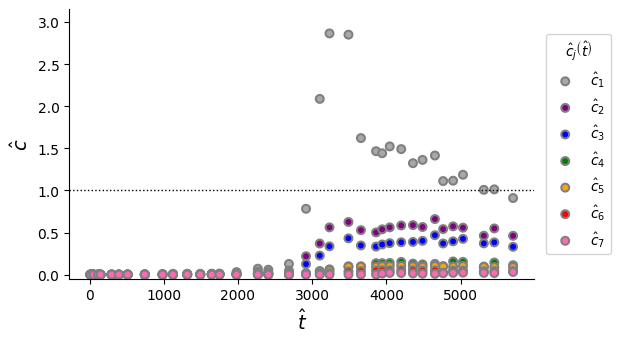

In [8]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[[f"{k} C/C0" for k in contaminants]].to_numpy().T,
    c_0=c_0,
)

experimental_data.plot_breakthrough()

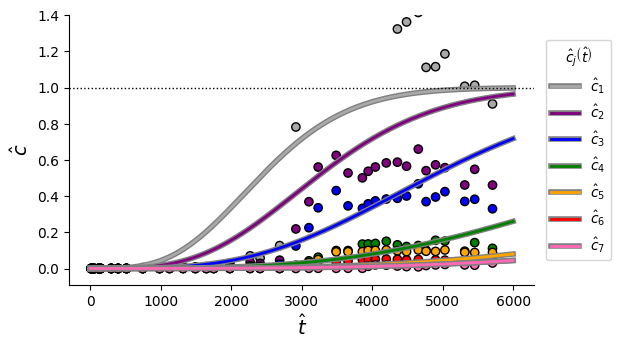

In [9]:
# Trying out some arbitrary parameters

p = PhysicalParams(
    L=lenght,  # cm
    v=pore_velocity,  # cm/min
    n=porosity,  # -
    sm=1e8,  # nmol/cm³
    k_ads=[*(150,) * 7],  # 1/min
    k_des=(0.06, 0.045, 0.03, 0.018, 0.012, 0.01, 0.01),  # 1/min
    C_0=c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 6000
sim.write_every = 100
sim.cfl = 0.92
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

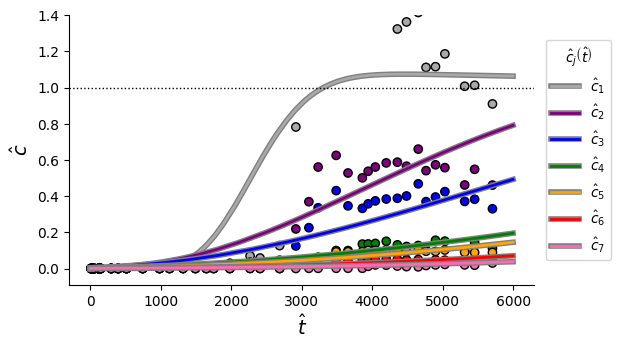

In [11]:
# OSTRICH - GML
optimal_parameter_set = [
    6.045903e00,
    2.520938e00,
    1.892065e00,
    1.808398e00,
    1.807437e00,
    1.835754e00,
    1.901396e00,
    1.924460e00,
    -8.736349e-01,
    -1.834976e00,
    -2.114425e00,
    -2.421817e00,
    -2.463818e00,
    -2.540544e00,
    -2.663202e00,
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:8],
    k_des=optimal_parameter_set[8:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 6000
sim.cfl = 0.85
sim.solve()

display(plot_btc_and_data(sim, experimental_data))